In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [32]:
run = 10897
asic = 0
path      = "/home/vherrero/CALIBRATION_FILES/"
#path_data = "/analysis/" + str(run) + "/hdf5/data/"
path_data = "/home/vherrero/CALIBRATION_FILES/"

# DATA SELECTION

In [ ]:
filename = path_data + "calibration_tpulse_nocompressor_210713.h5"
channel = 63
tac     = 3
tpulse  = 359500
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]
#plt.figure()
#plt.plot((data['tfine']))
#delays = np.unique(data_tc['delay'].to_numpy())
#print(delays)

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
#coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

# Two distributions
#print(np.std(data_fit['tfine'].to_numpy()))
if  np.std(data_fit['tfine'].to_numpy())> 10 :
    
    # Fit Left   
    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis)
    
    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
    coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,True,axis2)
    
    
else:
    # Usual case
    print('3')
    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis)
    coeff_l = coeff_d = coeff
    coeff_err_l = coeff_err_d =coeff_err
    moda_d = moda_l = moda
    sigma_d = sigma_l = sigma
    chi_d = chi_l = chi
    # Fit fails with narrow distribution
    if (sigma < 1.5) :
        print("Fit failure")
        print('4')
        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,True,axis)
        moda = coeff[1]
        sigma = coeff[2]
        coeff_l = coeff_d = coeff
        coeff_err_l = coeff_err_d =coeff_err
        moda_d = moda_l = moda
        sigma_d = sigma_l = sigma
        chi_d = chi_l = chi
                    
print(i,ch,tc,moda_l,sigma_l,chi_l)
print(i,ch,tc,moda_d,sigma_d,chi_d)
#axis.plot(TPcal.semigauss(np.arange(0,410), 400, 3, -10,100))


In [ ]:
fig = plt.figure()
axis = fig.add_subplot(121)
axis2 = fig.add_subplot(122)

#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis2)

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [ ]:
filename = path_data + "calibration_tpulse_nocompressor_210713.h5"  #ASIC + "_tdc_tpulse.h5"

channels = range(0,64)
tacs = range(0,4)
        
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
                
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:

                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                values,bins = np.histogram(data_fit['tfine'],rango_fit)
                peak = bins[np.argmax(values)]
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 10 :
                
                        # Fit Left   
                    data_fit_sel = data_fit[data_fit['tfine']<(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_l,sigma_l,chi_l = [np.min(data_fit_sel['tfine']),1,0]
                    else:    
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    data_fit_sel = data_fit[data_fit['tfine']>(rango_fit/2.0 + np.min(data_fit['tfine']))]
                    rango_fit_sel = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                    if (rango_fit_sel==0):
                        #Only one bin left
                        moda_d,sigma_d,chi_d = [np.min(data_fit_sel['tfine']),1,0]
                    else:
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit_sel,False)
                    
                    # First mu and sigma are the most probable
                    if peak > (rango_fit/2.0 + np.min(data_fit['tfine'])):
                        a,b,c,d,e = coeff_l,coeff_err_l,moda_l,sigma_l,chi_l
                        coeff_l,coeff_err_l,moda_l,sigma_l,chi_l = coeff_d,coeff_err_d,moda_d,sigma_d,chi_d
                        coeff_d,coeff_err_d,moda_d,sigma_d,chi_d = a,b,c,d,e
                        
                
                else:
                    # Usual case
                    print('3')
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False) 
                    coeff_l = coeff_d = coeff
                    coeff_err_l = coeff_err_d =coeff_err
                    moda_d = moda_l = moda
                    sigma_d = sigma_l = sigma
                    chi_d = chi_l = chi
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        print('4')
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                        coeff_l = coeff_d = coeff
                        coeff_err_l = coeff_err_d = coeff_err
                        moda_d = moda_l = moda
                        sigma_d = sigma_l = sigma
                        chi_d = chi_l = chi
                        
                print(i,ch,tc,moda_l,sigma_l,chi_l,moda_d,sigma_d,chi_d)               
                res.append([ch,tc,i,moda_l,np.abs(sigma_l),moda_d,np.abs(sigma_d)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma','mu2','sigma2'])
        

In [ ]:
storage = pd.HDFStore(path + "/data/" + ASIC + "_tfine_fitted_210713.h5",'w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [ ]:
channels = range(0,64) #[1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf(path + "/data/" + asic + "_tfine_fitted_210713.h5",key='tfine')
data['phase'] = data['phase']/1000.0
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2],gb])
        print(coeff)


In [ ]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset','chi'])
storage = pd.HDFStore(path + '/tfine_cal_asic0.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

In [ ]:
df_tfine_cal[df_tfine_cal['chi']>1]
df_tfine_cal

In [ ]:
channel = 46
tac     = 1
ASIC = 'asic0'
data = pd.read_hdf(path + "/data/" + ASIC + "_tfine_fitted_210713.h5",key='tfine')
data['phase']=data['phase']/1000.0

gb,coeff = TPcal.TDC_fit(data,channel,tac, plot=True)
print(coeff)

plt.figure()
y=TPcal.sawtooth_inv_corr(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],*coeff)
plt.plot(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],y,'.')
wp=TPcal.sawtooth_inv_corr(np.arange(200,400,0.01),*coeff)


# QDC CALIBRATION

# GAUSSIAN FITTING FOR EFINE DATA

<IPython.core.display.Javascript object>


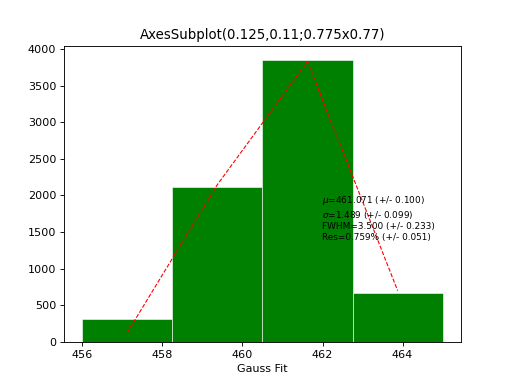

Fitting Problems
2 460.89085928489044
3 inf
4 0.10027988325719227
5 0 120 461.07100061661527 0.10027988325719227
[4.10306095e+03 4.61071001e+02 1.48935826e+00]


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


In [33]:
#filename = '/home/viherbos/DATA_daq/CAL_data/asic2_qdc_tpulse.h5'
filename = path_data + "10897_qdc_ch5_asic0_0v.h5"
channel = 5
tac     = 0
phase   = 120

data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==phase]
data = np.mod(data['efine'] - 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
#if (np.std(data) < 0.8):
#    coeff = [1000,np.mean(data),np.std(data)]
#else:
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

#coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,7,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

In [34]:
#filename = path + '/data' + '/asic'+str(asic)+'_qdc_tpulse.h5'
asic = 0
filename = path_data + "10897_qdc_ch5_asic0_0v.h5"
#channels = list(range(0,64))
#channels.pop(56)
#channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
channels = [5]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] - 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([asic,ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','tpulse','mu','sigma'])

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:218: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
5 0 0 0.0 0.0
Fitting Problems
5 0 10 0.0 0.0
Fitting Problems
5 0 20 0.0 0.0
Fitting Problems
5 0 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 40 1.0005702879954377 1.0005702879954377
Fitting Problems
5 0 50 27.37275740524332 0.0014214042907903074
Fitting Problems
5 0 60 88.985488033553 0.014744202319211204
Fitting Problems
5 0 70 175.553978973424 0.11320624488332784
Fitting Problems
5 0 80 238.1960358088773 0.02332131782207515
Fitting Problems
5 0 90 296.42231212019186 0.03004498982943883
Fitting Problems
5 0 100 351.47615984847243 0.04443687175272082
Fitting Problems
5 0 110 406.4500572639638 0.15006773553448133
Fitting Problems
5 0 120 461.0710

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

5 0 190 721.5508379626921 0.12606563803605753
Fitting Problems
5 0 200 725.2388085248706 0.3659351699664446
Fitting Problems
5 0 210 725.8250420640022 0.04808019700955428
Fitting Problems
5 0 220 726.5310112292036 0.20056465966920323
Fitting Problems
5 0 230 726.5254243489059 0.21455614701596065
Fitting Problems
5 0 240 726.5322184909811 0.08437372571905218
Fitting Problems
5 0 250 727.3359581326682 0.41553928446276067
Fitting Problems
5 0 260 726.3029675852307 0.20712676614974382
Fitting Problems
5 0 270 726.7868396996023 0.028776372215362486
Fitting Problems
5 0 280 726.3545901837952 0.08940472552777642
Fitting Problems
5 0 290 726.7392133898031 0.03245549040268948
Fitting Problems
5 1 0 0.0 0.0
Fitting Problems
5 1 10 0.0 0.0
Fitting Problems
5 1 20 0.0 0.0
Fitting Problems
5 1 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 40 1.0005702066999287 1.0005702066999287
Fitting Problems
5 1 50 26.72175384688518 0.002063992726256986
Fitting Problems
5 1 60 88.3167511268086 0.04139283295265464
Fitting Problems
5 1 70 174.98907037244575 0.06537349388376341


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
5 1 80 238.14934291680777 0.022097111649368343
Fitting Problems
5 1 90 296.29564837662286 0.024439223257586053
Fitting Problems
5 1 100 350.7407591820382 0.00621104519752593
Fitting Problems
5 1 110 406.4013263183509 0.18379909327197588
Fitting Problems
5 1 120 461.46554286327125 0.15621048458864975
Fitting Problems
5 1 130 514.3361144847814 0.018736021025421292
Fitting Problems
5 1 140 563.7998388851454 0.0027986024296681867
Fitting Problems
5 1 150 611.3393389197502 0.309845986936463
Fitting Problems
5 1 160 654.4576384729125 0.11872070025372661
Fitting Problems
5 1 170 688.9066035060537 0.02686370441490628
Fitting Problems
5 1 180 710.6864197342808 0.04622743584016475
Fitting Problems
5 1 190 721.842550435981 0.1946206216947252
Fitting Problems
5 1 200 725.0679149725065 0.5570948846368985
Fitting Problems
5 1 210 725.6841930563693 0.08496995403351283
Fitting Problems
5 1 220 726.4562723615642 0.39200409910240075
Fitting Problems
5 1 230 726.361865152032 0.6876033524

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

5 1 270 726.62135704353 0.04224479269995361
Fitting Problems
5 1 280 726.1329273505045 0.18044269764935397
Fitting Problems
5 1 290 726.505111277445 0.06590506209184407
Fitting Problems
5 2 0 0.0 0.0
Fitting Problems
5 2 10 0.0 0.0
Fitting Problems
5 2 20 0.0 0.0
Fitting Problems
5 2 30 0.0 0.0
Fitting Problems
5 2 40 1.0 1.0
Fitting Problems
5 2 50 26.847246184695095 0.0001935517840825136
Fitting Problems
5 2 60 87.48857837774054 0.0020173421772751578
Fitting Problems
5 2 70 173.74772401081614 0.0793419344382209
Fitting Problems
5 2 80 237.5732597685185 0.0027094201513806274
Fitting Problems
5 2 90 295.1982138147064 0.01168872099406085
Fitting Problems
5 2 100 349.75276865101756 0.02781364391099123
Fitting Problems
5 2 110 404.5930580280653 0.0003765011902064887
Fitting Problems
5 2 120 459.52568378274134 0.031200525922042345
Fitting Problems
5 2 130 513.0654455238778 0.01010673124306926
Fitting Problems
5 2 140 562.7464994486377 0.044710038305681994
Fitting Problems
5 2 150 609.66972

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

5 2 200 724.5399401874232 0.1261402615865529
Fitting Problems
5 2 210 725.5353494713804 0.16792475067430618
Fitting Problems
5 2 220 726.403190229567 0.8172614067863612
Fitting Problems
5 2 230 725.8475185595067 0.045926151118945296
Fitting Problems
5 2 240 726.3517980636856 0.28732336596828106
Fitting Problems
5 2 250 726.6698189020613 0.0744739244942012
Fitting Problems
5 2 260 726.4264411847968 0.2090623113928446
Fitting Problems
5 2 270 726.4897815239841 0.08130705132791495
Fitting Problems
5 2 280 725.9347478546946 0.26676049887847186
Fitting Problems
5 2 290 726.5885787394067 0.05444508040497436
Fitting Problems
5 3 0 0.0 0.0
Fitting Problems
5 3 10 0.0 0.0
Fitting Problems
5 3 20 0.0 0.0
Fitting Problems
5 3 30 0.0 0.0
Fitting Problems
5 3 40 0.999001996007984 0.999001996007984
Fitting Problems
5 3 50 25.89391719833523 0.00011634448561459238
Fitting Problems
5 3 60 84.76565542880765 0.022805331404466896
Fitting Problems
5 3 70 171.46196693659613 0.18116422575249597
Fitting Probl

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

In [35]:
storage = pd.HDFStore(path + '/asic'+str(asic)+'_efine_fitted_ch5_10897.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

<IPython.core.display.Javascript object>


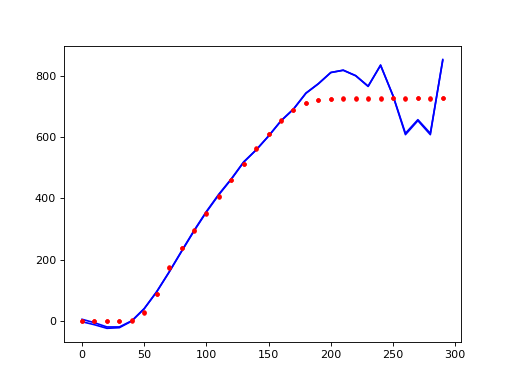

[-2.98469842e+00 -3.97041111e-02 -1.50510673e-01  6.36696944e-03
 -8.07658548e-05  4.79686888e-07 -1.36980797e-09  1.50925114e-12
 -8.08800138e-18 -6.16850437e-19] [ 5.01456486e+00 -8.69158646e-02 -1.62661332e-01  6.72498091e-03
 -8.48999777e-05  5.02875308e-07 -1.43277424e-09  1.57550717e-12
 -8.31368867e-18 -6.02708308e-19]


In [37]:
data = pd.read_hdf(path + '/asic'+str(asic)+'_efine_fitted_ch5_10896.h5',key='efine')
data2 = pd.read_hdf(path + '/asic'+str(asic)+'_efine_fitted_ch5_10897.h5',key='efine')
channel_id = 5
tac_id     = 0
fig = plt.figure()
axis = fig.add_subplot(111)
#data_sel = data[(data['channel_id']==9) & (data['tac_id']==0)]
#axis.plot(data_sel['tpulse'],data_sel['mu'])
a = TPcal.QDC_fit_p(data,channel_id,tac_id,plot=True,axis=axis)
b = TPcal.QDC_fit_p(data2,channel_id,tac_id,plot=True,axis=axis)
print(a,b)


In [ ]:
filename = path + '/asic'+str(asic)+'_efine_fitted_run10888.h5'
channels = list(range(0,64))
channels.pop(56)
#channels = [6,8,10,12,14,15,16,18,19,20,22,25,26,28,30,31]
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        spl_conf = TPcal.QDC_fit_p(data_tc,ch,tc,plot=False)
        res.append([asic,ch,tc,*spl_conf])

#df_qfine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','spl0','spl1','spl2','spl3',
#                                     'spl4','spl5','spl6','spl7','spl8','spl9'])
df_qfine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id',
                                     'c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])


In [ ]:
storage = pd.HDFStore(path + '/asic' +str(asic)+'_efine_cal_poly_HIGHGAIN.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# THRESHOLD T1

In [ ]:
filename = path + "/asic0_t1_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],fit.coeff[2]])

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,49,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

# THRESHOLD T2

In [ ]:
filename = path +"/thr_asic0_t2_lsb58_baseline30_49v.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],fit.coeff[2]])
        
df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

In [ ]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,0,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

In [ ]:
storage = pd.HDFStore(path + '/asic0_thresholds_cal_49v.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# TDC COMPARISON

filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_210712_a.h5"
channel = 20
tac     = 0
tpulse  = 0
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]

In [ ]:
filename = path + "/data/" + "tdc_asic0_allch_nocompressor_210710.h5"  #ASIC + "_tdc_tpulse.h5"
channel = 20
tac = 0

channels = [channel] #channels = range(0,64)
tacs = [tac]         #tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
        print(delays)
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 50 :
                    sel_1 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    sel_2 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    if sel_1 > sel_2:
                        data_fit_sel = data_fit[data_fit['tfine']<300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                    else:
                        data_fit_sel = data_fit[data_fit['tfine']>300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                else:
                    # Usual case
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False)
                    
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                    
                print(i,ch,tc,moda,sigma,coeff[1],coeff_err[1],chi)
                
                res.append([ch,tc,i,moda,np.abs(sigma)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

In [ ]:
for tc in tacs:
    df_tfine['phase']=df_tfine['phase']/1000.0
    gb,coeff = TPcal.TDC_fit(df_tfine,channel,tac, plot=True)
    res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
    print(coeff)
